# Library import

In [1]:
import tensorflow as tf
import keras.api as keras
from keras.api import layers
from keras.api.layers import Conv2D, LeakyReLU, Flatten, Dropout, Dense
import matplotlib.pyplot as plt
import numpy as np

2025-03-16 15:08:14.189237: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742148494.204726  199487 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742148494.209342  199487 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-16 15:08:14.224925: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Functions

In [41]:
def normalize(image):
    image = tf.cast(image, tf.float32) / 255.0
    image = (image - 0.5) * 2
    return image

def loss_discriminador(real_output, fake_output):
    real_loss = keras.losses.BinaryCrossentropy()(tf.ones_like(real_output), real_output)
    fake_loss = keras.losses.BinaryCrossentropy()(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def loss_gerador(fake_output):
    return keras.losses.BinaryCrossentropy()(tf.ones_like(fake_output), fake_output)

def create_generator():

    input = layers.Input((100,))
    x = layers.Dense(4*4*256, use_bias=True)(input)
    x = layers.LeakyReLU()(x)
    x = layers.Reshape((4, 4, 256))(x)

    x= layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same', use_bias=False)(x)
    x= layers.BatchNormalization()(x)
    x= layers.LeakyReLU(.2)(x)
    

    x= layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', use_bias=False)(x)
    x= layers.BatchNormalization()(x)
    x= layers.LeakyReLU(.2)(x)
    
    x= layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', use_bias=False)(x)
    x= layers.BatchNormalization()(x)
    x= layers.LeakyReLU(.2)(x)

    x= layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', use_bias=False)(x)
    x= layers.BatchNormalization()(x)
    x= layers.LeakyReLU(.2)(x)
    
    x = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', use_bias=False)(x)
    x= layers.BatchNormalization()(x)
    x = layers.LeakyReLU(.2)(x)

    x = Conv2D(1,3,1,'same', use_bias=True)(x)
    output = layers.Activation('sigmoid')(x)

    model = keras.Model(input,output)
    
    return model

def create_discriminator():

    input = layers.Input((128,128,1))
    
    x = layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same')(input)
    x = layers.LeakyReLU()(x)
    
    x = layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = layers.LeakyReLU()(x)
    
    x = layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = layers.LeakyReLU()(x)
    
    x = layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = layers.LeakyReLU()(x)

    x = layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = layers.LeakyReLU()(x)
    
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(1)(x)
    output = layers.Activation('sigmoid')(x)


    modelo = keras.Model(input,output)
    
    return modelo

# Parameters

In [10]:
image_size = (128, 128)
channel = 1
BUFFER_SIZE = 60000
BATCH_SIZE = 64
dataset_path = "../../data/train/"

# Dataset load

Found 2422 files.


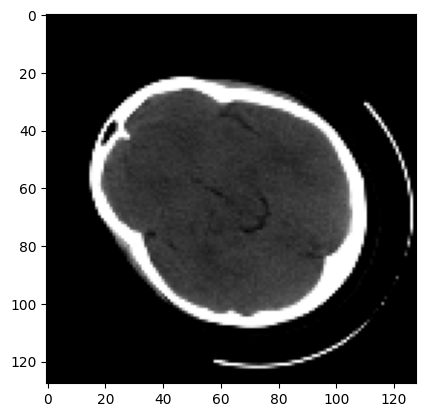

In [35]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    label_mode=None,
    color_mode='grayscale',
    image_size=image_size,
    shuffle=True,
    seed = 1567,
    batch_size=BATCH_SIZE
)
train_ds = train_ds.map(lambda x: (normalize(x)))

for batch in train_ds:
    for image in batch:
        plt.imshow(image,cmap=plt.cm.gray)
        plt.show()
        break
    break

# Create models

In [42]:
gen = create_generator()
dis = create_discriminator()

# Configurate optimizers

In [43]:
gen_opt = keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.5)
dis_opt = keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.5)